# Resultados Previos

In [1]:
# Librerías
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score#,max_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

import os

#import xgboost

# Numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

## Se cargan los datos

### SD

In [2]:
ruta = os.path.join("Data","")

datosSD = pd.read_excel(ruta+"UNIANDES_SD_2021-02-01.xlsx")
datosSD = datosSD.replace("--", np.nan)
datosSDconFecha = datosSD.set_index('Date & Time')
"Faltan 250 temperaturas, 203 irradiancias y 196 velocidades de viento, se tienen desde 2019-05-07 16:00:00 a 2021-02-01 09:00:00, casi 1 año y 9 meses"

'Faltan 250 temperaturas, 203 irradiancias y 196 velocidades de viento, se tienen desde 2019-05-07 16:00:00 a 2021-02-01 09:00:00, casi 1 año y 9 meses'

In [3]:
datosSD.head()

,Date & Time,Date,Time,Temp - °C,Temp. Alta - °C,Temp. Baja - °C,Hum - %,Punto de rocío - °C,Wet Bulb - °C,Velocidad del viento - m/s,...,Tasa de lluvia - mm/h,Rad Solar - W/m^2,Energía solar,Rad Solar Alta - W/m^2,ET - mm,El índice UV - Index,Dosis de UV,Alto índice UV - Index,Días-grado de calentamiento,Días-grado de enfriamiento
0,2019-05-07 16:00:00,2019-05-07,16:00:00,21.2,21.3,21.2,47,9.5,12.2,0.9,...,0.0,--,NaN,NaN,0.00,1.6,0.69,1.6,0,0.217
1,2019-05-07 17:00:00,2019-05-07,17:00:00,19.4,23,19.4,52,9.3,11.8,0.4,...,0.0,59,5.08,162,0.05,0.4,0.17,1.6,0,0.083
2,2019-05-07 18:00:00,2019-05-07,18:00:00,17.4,19.5,17.4,60,9.6,11.7,1.3,...,0.0,47,4.04,97,0.05,0,0,0.5,0.067,0
3,2019-05-07 19:00:00,2019-05-07,19:00:00,16.4,17.4,16.3,64,9.6,11.5,2.2,...,0.0,0,0,0,0.03,0,0,0,0.142,0
4,2019-05-07 20:00:00,2019-05-07,20:00:00,16.3,16.6,16.1,67,10.2,11.9,0.9,...,0.0,0,0,0,0.03,0,0,0,0.15,0


In [8]:
list(datosSD)

['Date & Time',
 'Date',
 'Time',
 'Temp - °C',
 'Temp.\xa0Alta - °C',
 'Temp. Baja - °C',
 'Hum - %',
 'Punto de rocío - °C',
 'Wet Bulb - °C',
 'Velocidad del viento - m/s',
 'Dirección del viento',
 'Viento Corriente - m',
 'Alta velocidad del viento - m/s',
 'Alta Dirección del viento',
 'Viento Frío - °C',
 'Índice de calor - °C',
 'THW Index - °C',
 'THSW  índice - °C',
 'Barómetro - mm Hg',
 'Lluvia - mm',
 'Tasa de lluvia - mm/h',
 'Rad Solar - W/m^2',
 'Energía solar',
 'Rad Solar Alta - W/m^2',
 'ET - mm',
 'El índice UV - Index',
 'Dosis de UV',
 'Alto índice UV - Index',
 'Días-grado de calentamiento',
 'Días-grado de enfriamiento']

## SOLCAST

In [4]:
datos_solar =  pd.read_csv("datosSOLCAST_Unidos.csv")
datos_solar.describe()

,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
count,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000,123334.000000
mean,16.490122,0.125194,-0.150737,41.219229,13.910538,125.877317,112.551794,75.497251,201.377852,195.636361,226.108932,25.987851,86.019176,805.436811,134.665899,1.499023,89.963911
std,2.865403,0.005043,96.012780,27.319541,2.269917,167.664278,228.060272,168.530507,273.401148,263.397997,299.800713,4.089952,13.364029,24.324412,73.778456,0.629107,47.166742
min,5.300000,0.120000,-174.000000,0.000000,-5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,24.000000,734.200000,0.000000,0.000000,6.000000
25%,14.600000,0.120000,-89.000000,17.600000,13.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.600000,79.300000,812.800000,101.000000,1.100000,48.250000
50%,16.500000,0.130000,-14.000000,43.700000,14.400000,7.000000,0.000000,0.000000,9.000000,9.000000,8.000000,26.600000,90.300000,814.200000,124.000000,1.500000,89.000000
75%,18.500000,0.130000,89.000000,63.400000,15.300000,233.000000,95.000000,45.000000,374.000000,369.000000,441.000000,28.900000,96.700000,815.200000,140.000000,1.900000,133.000000
max,25.500000,0.140000,170.000000,100.000000,19.300000,726.000000,1118.000000,1037.000000,1129.000000,1092.000000,1119.000000,38.600000,100.000000,819.500000,360.000000,8.400000,175.000000


"Los datos de Solar se tiene: 2007-01-01T01:00:00Z - 2021-01-25T22:00:00Z"

In [5]:
# Se arregla la zona horaria de los datos
datos_solar['Date & Time'] = (pd.to_datetime(datos_solar['PeriodStart']) - \
                              pd.Timedelta(hours=5)).dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
datos_solar['Date & Time']

0        2006-12-31 20:00:00
1        2006-12-31 21:00:00
2        2006-12-31 22:00:00
3        2006-12-31 23:00:00
4        2007-01-01 00:00:00
5        2007-01-01 01:00:00
6        2007-01-01 02:00:00
7        2007-01-01 03:00:00
8        2007-01-01 04:00:00
9        2007-01-01 05:00:00
10       2007-01-01 06:00:00
11       2007-01-01 07:00:00
12       2007-01-01 08:00:00
13       2007-01-01 09:00:00
14       2007-01-01 10:00:00
15       2007-01-01 11:00:00
16       2007-01-01 12:00:00
17       2007-01-01 13:00:00
18       2007-01-01 14:00:00
19       2007-01-01 15:00:00
20       2007-01-01 16:00:00
21       2007-01-01 17:00:00
22       2007-01-01 18:00:00
23       2007-01-01 19:00:00
24       2007-01-01 20:00:00
25       2007-01-01 21:00:00
26       2007-01-01 22:00:00
27       2007-01-01 23:00:00
28       2007-01-02 00:00:00
29       2007-01-02 01:00:00
                 ...        
123304   2021-01-24 11:00:00
123305   2021-01-24 12:00:00
123306   2021-01-24 13:00:00
123307   2021-

## SD Temp

In [6]:
datosTempSD = pd.read_csv('Temp_SD_2019_01_01_2021_04_28.csv', sep=";")#,error_bad_lines=False)
datosTempSD.columns = ["Time", "Tc", "Ta"]
datosTempSD["Tc"] = datosTempSD["Tc"].str.replace(",",".").astype(float)
datosTempSD["Ta"] = datosTempSD["Ta"].str.replace(",",".").astype(float)

datosTempSD = datosTempSD[(~datosTempSD["Tc"].isna())].reset_index(drop=True)

datosTempSD.head()

,Time,Tc,Ta
0,2019-10-01 00:00:00,10.274,NaN
1,2019-10-01 01:00:00,10.394,NaN
2,2019-10-01 02:00:00,9.590,NaN
3,2019-10-01 03:00:00,9.431,NaN
4,2019-10-01 04:00:00,10.331,NaN


# Modelos

In [23]:
datosSD = datosSD.replace("--", np.nan)
shuffle_data = datosSD.dropna().sample(frac=1)
shuffle_data.describe()

,Temp - °C,Temp. Alta - °C,Temp. Baja - °C,Hum - %,Punto de rocío - °C,Wet Bulb - °C,Velocidad del viento - m/s,Viento Corriente - m,Alta velocidad del viento - m/s,Viento Frío - °C,...,Tasa de lluvia - mm/h,Rad Solar - W/m^2,Energía solar,Rad Solar Alta - W/m^2,ET - mm,El índice UV - Index,Dosis de UV,Alto índice UV - Index,Días-grado de calentamiento,Días-grado de enfriamiento
count,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,...,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000,14894.000000
mean,14.216302,14.771633,13.685296,74.170538,9.476702,10.866262,1.599241,1.614530,5.190741,13.995273,...,0.675561,144.234793,12.410563,257.933799,0.113475,1.330153,0.570051,2.218424,0.195942,0.003643
std,2.641308,2.714564,2.528929,11.102408,1.803435,1.624908,0.995401,0.987616,2.469147,2.837686,...,6.288449,221.740582,19.079338,370.310084,0.142433,2.260195,0.968655,3.546739,0.127656,0.016966
min,6.100000,7.400000,5.900000,21.000000,-6.100000,-0.700000,0.400000,0.450000,0.900000,3.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.300000,12.800000,11.800000,67.000000,8.600000,10.000000,0.900000,0.890000,3.600000,12.100000,...,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.100000,0.000000
50%,13.800000,14.300000,13.300000,76.000000,9.600000,11.000000,1.300000,1.340000,4.900000,13.700000,...,0.000000,3.000000,0.260000,16.000000,0.030000,0.000000,0.000000,0.000000,0.197000,0.000000
75%,16.100000,16.800000,15.500000,82.000000,10.600000,11.900000,2.200000,2.240000,6.700000,16.000000,...,0.000000,243.000000,20.910000,434.000000,0.180000,2.000000,0.860000,3.500000,0.271000,0.000000
max,24.100000,24.600000,22.400000,95.000000,14.500000,15.700000,8.500000,8.490000,19.200000,24.100000,...,235.200000,1151.000000,99.040000,1517.000000,0.760000,11.900000,5.100000,16.000000,0.808000,0.238000


In [24]:
dataX = shuffle_data.drop(columns="Temp - °C")
dataY = shuffle_data["Temp - °C"]
"""dataX = dataX.replace("--", np.nan)
dataY = dataY.replace("--", np.nan)"""

'dataX = dataX.replace("--", np.nan)\ndataY = dataY.replace("--", np.nan)'

In [25]:
dataX = dataX.select_dtypes(include=numerics)
dataX.dtypes

Temp. Alta - °C                    float64
Temp. Baja - °C                    float64
Hum - %                            float64
Punto de rocío - °C                float64
Wet Bulb - °C                      float64
Velocidad del viento - m/s         float64
Viento Corriente - m               float64
Alta velocidad del viento - m/s    float64
Viento Frío - °C                   float64
Índice de calor - °C               float64
THW Index - °C                     float64
THSW  índice - °C                  float64
Barómetro - mm Hg                  float64
Lluvia - mm                        float64
Tasa de lluvia - mm/h              float64
Rad Solar - W/m^2                  float64
Energía solar                      float64
Rad Solar Alta - W/m^2             float64
ET - mm                            float64
El índice UV - Index               float64
Dosis de UV                        float64
Alto índice UV - Index             float64
Días-grado de calentamiento        float64
Días-grado 

In [26]:
# Se dividen los datos
train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

RMSE: 0.03143017673221247
MAE: 0.014370396236342854
MBE: -0.00012946726137314874
R2: 0.9998600706197284


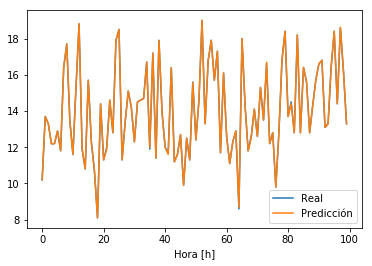

In [28]:
# Modelo
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Errores
rmse = math.sqrt(mean_squared_error(testY, yPredict))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredict)
print("MAE:", mae)

mbe = np.mean(yPredict-testY)
print('MBE: ' + str(mbe)) #Mean Bias error

r2 = r2_score(testY,yPredict) 
print("R2:", r2)

x = range(len(testY))

# Gráficas
plt.xlabel("Hora [h]")
#plt.ylabel(y_label)

plt.plot(x[:100], testY[:100])
plt.plot(x[:100], yPredict[:100])
#plt.title(titulo)
plt.legend(["Real", "Predicción"])
plt.show()

In [29]:
coeficientes = list(zip(dataX.columns, clf.coef_))
sorted(coeficientes, key=lambda x: -abs(x[1]))

[('Índice de calor - °C', 0.9764932483430144),
 ('Viento Frío - °C', 0.924192680311921),
 ('THW Index - °C', -0.9104038515589624),
 ('Dosis de UV', 0.09967783001400829),
 ('Energía solar', 0.08645511079046964),
 ('El índice UV - Index', -0.041971670404851114),
 ('Días-grado de enfriamiento', 0.041409534309880126),
 ('Viento Corriente - m', 0.03360751412991873),
 ('Velocidad del viento - m/s', -0.02645810671218168),
 ('Wet Bulb - °C', 0.018357052813801605),
 ('Punto de rocío - °C', -0.012615491046837547),
 ('Días-grado de calentamiento', -0.010956575242910938),
 ('ET - mm', 0.010000850400967166),
 ('Rad Solar - W/m^2', -0.007434713708849993),
 ('Temp. Baja - °C', 0.0019977710607957827),
 ('Hum - %', -0.0017814744497086918),
 ('Barómetro - mm Hg', 0.0010170426845218985),
 ('Alto índice UV - Index', -0.0006881254951677254),
 ('THSW  índice - °C', 0.0006861854781285471),
 ('Alta velocidad del viento - m/s', -0.0005991412408507677),
 ('Temp.\xa0Alta - °C', 0.00026877403251851376),
 ('Lluvia

In [32]:
prueba = datosSD.select_dtypes(include=numerics).dropna()

In [33]:
X2 = prueba.drop(columns="Temp - °C")
yPredict2 = clf.predict(X2)
testY2 = prueba["Temp - °C"]

# Errores
rmse2 = math.sqrt(mean_squared_error(testY2, yPredict2))
print("RMSE:", rmse2)

mae2 = mean_absolute_error(testY2, yPredict2)
print("MAE:", mae2)

mbe2 = np.mean(yPredict2 - testY2)
print('MBE: ' + str(mbe2)) #Mean Bias error

r2_2 = r2_score(testY2,yPredict2) 
print("R2:", r2_2)

RMSE: 0.03128527398306145
MAE: 0.014299886990891159
MBE: -0.0003055631447436764
R2: 0.9998590784626201


Para completar los datos faltantes de temperatura los mismos datos del SD son muy efectivos

## Normalizando

In [13]:
''' Esto lo había hecho antes para los datos del SD viejos, re hacer'''

from sklearn import preprocessing
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

x = shuffle_data.select_dtypes(include=numerics).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

normalized_shuffle_data = pd.DataFrame(x_scaled, columns = shuffle_data.select_dtypes(include=numerics).columns)
normalized_shuffle_data

,Alta velocidad del viento - m/s,Barómetro - mm Hg,Lluvia - mm,Tasa de lluvia - mm/h,ET - mm
0,0.093750,0.389313,0.000000,0.000000,0.328947
1,0.395833,0.488550,0.000000,0.000000,0.473684
2,0.067708,0.435115,0.000000,0.000000,0.000000
3,0.328125,0.473282,0.000000,0.000000,0.039474
4,0.489583,0.297710,0.000000,0.000000,0.328947
5,0.348958,0.458015,0.000000,0.000000,0.065789
6,0.255208,0.465649,0.000000,0.000000,0.039474
7,0.234375,0.419847,0.000000,0.000000,0.039474
8,0.255208,0.419847,0.281046,0.189626,0.000000
9,0.583333,0.320611,0.000000,0.000000,0.197368


In [15]:
train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

# Modelo
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Errores
rmse = math.sqrt(mean_squared_error(testY, yPredict))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredict)
print("MAE:", mae)

mbe = np.mean(pred-true)
print('MBE: ' + str(mbe)) #Mean Bias error

r2 = r2_score(testY,yPredict) 
print("R2:", r2)

x = range(len(testY))

# Gráficas
plt.xlabel("Hora [h]")
#plt.ylabel(y_label)

plt.plot(x[:100], testY[:100])
plt.plot(x[:100], yPredict[:100])
#plt.title(titulo)
plt.legend(["Real", "Predicción"])
plt.show()

NameError: name 'trainX' is not defined

In [ ]:
coeficientes = list(zip(dataX.columns, clf.coef_))
sorted(coeficientes, key=lambda x: -abs(x[1]))

## Con datos de Enel (wetransfer)

Fecha mínima 2019-01-30 06:00:00
Fecha máxima 2021-02-11 00:00:00

In [69]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

datos_Enel_numeric = datos_Enel.select_dtypes(include=numerics)

shuffle_datos_Enel_numeric = datos_Enel_numeric.sample(frac=1)

shuffle_datos_Enel_numeric = shuffle_datos_Enel_numeric.dropna()

shuffle_datos_Enel_numeric.head()

,Temp - °C,Temp. Alta - °C,Temp. Baja - °C,Hum - %,Punto de rocío - °C,Wet Bulb - °C,Velocidad del viento - m/s,Viento Corriente - m,Alta velocidad del viento - m/s,Viento Frío - °C,...,Tasa de lluvia - mm/h,Rad Solar - W/m^2,Energía solar,Rad Solar Alta - W/m^2,ET - mm,El índice UV - Index,Dosis de UV,Alto índice UV - Index,Días-grado de calentamiento,Días-grado de enfriamiento
Date & Time,,,,,,,,,,,,,,,,,,,,,
2020-12-29 13:00:00,18.9,20.7,18.9,63.0,11.7,13.6,0.9,0.89,4.9,18.9,...,0.0,211.0,18.16,345.0,0.20,3.7,1.59,10.9,0.000,0.025
2020-07-24 18:00:00,15.5,16.0,15.4,69.0,9.8,11.5,2.2,2.24,5.4,15.5,...,0.0,45.0,3.87,118.0,0.05,0.0,0.00,0.0,0.118,0.000
2020-02-19 03:00:00,14.9,15.2,14.4,70.0,9.5,11.1,0.4,0.45,2.2,14.9,...,0.0,0.0,0.00,0.0,0.03,0.0,0.00,0.0,0.141,0.000
2019-09-11 08:00:00,15.3,15.3,12.6,68.0,9.4,11.1,0.9,0.89,4.5,15.3,...,0.0,224.0,19.27,348.0,0.13,1.2,0.51,2.3,0.127,0.000
2020-10-04 03:00:00,12.1,12.5,11.8,88.0,10.1,10.8,0.9,0.89,2.7,12.1,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.262,0.000


In [70]:
list(datos_Enel)

['Date',
 'Time',
 'Temp - °C',
 'Temp.\xa0Alta - °C',
 'Temp. Baja - °C',
 'Hum - %',
 'Punto de rocío - °C',
 'Wet Bulb - °C',
 'Velocidad del viento - m/s',
 'Dirección del viento',
 'Viento Corriente - m',
 'Alta velocidad del viento - m/s',
 'Alta Dirección del viento',
 'Viento Frío - °C',
 'Índice de calor - °C',
 'THW Index - °C',
 'THSW  índice - °C',
 'Barómetro - mm Hg',
 'Lluvia - mm',
 'Tasa de lluvia - mm/h',
 'Rad Solar - W/m^2',
 'Energía solar',
 'Rad Solar Alta - W/m^2',
 'ET - mm',
 'El índice UV - Index',
 'Dosis de UV',
 'Alto índice UV - Index',
 'Días-grado de calentamiento',
 'Días-grado de enfriamiento']

In [71]:
shuffle_datos_Enel_numeric.shape

(15002, 25)

In [72]:
#dataX = shuffle_data.select_dtypes(include=numerics).drop(columns="Temp")
dataX = shuffle_datos_Enel_numeric.drop(columns='Temp - °C')
dataY = shuffle_datos_Enel_numeric['Temp - °C']

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

RMSE: 0.031200153732737965
MAE: 0.0144908514881165
R2: 0.9998593271608162


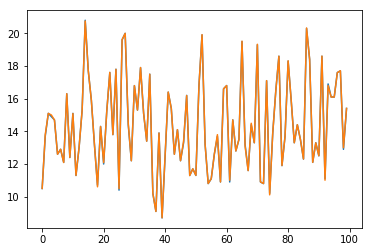

In [73]:
# Modelo
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Errores
rmse = math.sqrt(mean_squared_error(testY, yPredict))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredict)
print("MAE:", mae)

r2 = r2_score(testY,yPredict) 
print("R2:", r2)

x = range(len(testY))

# Gráficas
plt.plot(x[:100], testY[:100])
plt.plot(x[:100], yPredict[:100])
plt.show()

In [74]:
coeficientes = list(zip(dataX.columns, clf.coef_))
sorted(coeficientes, key=lambda x: -abs(x[1]))

[('Índice de calor - °C', 0.9744161422582798),
 ('Viento Frío - °C', 0.9184740608590207),
 ('THW Index - °C', -0.9041748254686227),
 ('Días-grado de enfriamiento', 0.029591475260149908),
 ('Viento Corriente - m', 0.025042486314319802),
 ('Velocidad del viento - m/s', -0.018142538266856537),
 ('Días-grado de calentamiento', -0.016337385435675505),
 ('ET - mm', 0.01357937762509808),
 ('Wet Bulb - °C', 0.01311345558013278),
 ('Dosis de UV', 0.012715306798083924),
 ('Energía solar', -0.007550443808129459),
 ('Punto de rocío - °C', -0.006658707262929673),
 ('El índice UV - Index', -0.004327066532403481),
 ('Temp. Baja - °C', 0.002471883804264427),
 ('Hum - %', -0.002372438470465241),
 ('Barómetro - mm Hg', 0.0012468551424631316),
 ('Alto índice UV - Index', -0.0009319856411582676),
 ('Rad Solar - W/m^2', 0.000652857318365298),
 ('THSW  índice - °C', 0.0005377794426662917),
 ('Alta velocidad del viento - m/s', -0.0005170430594506059),
 ('Temp.\xa0Alta - °C', 0.0002735273409813512),
 ('Lluvia

In sitio 2019-2020

satelitales para completar los datos in sitio

Tenemos varios modelos para la temperatura, este es el que mejor da, revisar el overfitting

## Se prueba omitiendo los ceros entre las 6pm y 6am

In [75]:
# Se prueba omitiendo los ceros entre las 6pm y 6am
dataX = dataX[datosSDSinCompletar.RadSolar!=0]
dataY = datosSDSinCompletar.RadSolar[datosSDSinCompletar.RadSolar!=0]

# Se dividen los datos
train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

# Modelo de regresión lineal
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Cálculos de errores
rmse = math.sqrt(mean_squared_error(testY,yPredict))
print(rmse)

r2 = r2_score(testY,yPredict) 
print(r2)

# Se grafica
x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, yPredict)
plt.show()

NameError: name 'datosSDSinCompletar' is not defined

## Se prueba con las 3 irradiaciones

In [ ]:
# solo DHI, DNI y GHI de SolarCast
dataX= pd.DataFrame({'Dhi':datosSolarSinCompletar.Dhi, 'Dni':datosSolarSinCompletar.Dni, 'Ghi':datosSolarSinCompletar.Ghi})
dataY= datosSDSinCompletar.RadSolar

# Se dividen los datos
train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

# Se crea y ajusta el modelo de regresión
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Se calculan los errores
rmse = math.sqrt(mean_squared_error(testY,yPredict))
print(rmse)

r2 = r2_score(testY,yPredict) 
print(r2)

# Se grafica
x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, yPredict)
plt.show()

In [ ]:
# Se corrigen los ceros
correccionZeros = yPredict[testY==0]
copiaYPredict = yPredict
copiaYPredict[testY==0]=0

# Se recalculan los errores
rmse = math.sqrt(mean_squared_error(testY,copiaYPredict))
print(rmse)

r2 = r2_score(testY,copiaYPredict) 
print(r2)

# Se grafica
x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, copiaYPredict)
plt.show()

# Random Forest Regressor
## Se prueba con todos los datos disponibles

In [ ]:
dataXTodo = shuffle_data.select_dtypes(include=numerics).drop(columns="Temp")
dataX = shuffle_data[["AirTemp"]]
dataY = shuffle_data["Temp"]

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainXTodo, testXTodo = dataXTodo[0:train_size], dataXTodo[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]
model_rfTodo = RandomForestRegressor(n_estimators=100, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rfTodo.fit(trainXTodo, trainY)

yPredictTodo = model_rfTodo.predict(testXTodo)

rmse = math.sqrt(mean_squared_error(testY,yPredictTodo))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredictTodo)
print("MAE:", mae)

r2 = r2_score(testY, yPredictTodo) 
print("R2:", r2)

x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, yPredictTodo)
plt.show()

In [ ]:
dataXTodo = shuffle_wetransfer_numeric.drop(columns='Temp - °C')
dataX = shuffle_wetransfer_numeric[["Temp - °C"]]
dataY = shuffle_wetransfer_numeric['Temp - °C']

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainXTodo, testXTodo = dataXTodo[0:train_size], dataXTodo[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]
model_rfTodo = RandomForestRegressor(n_estimators=100, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rfTodo.fit(trainXTodo, trainY)

yPredictTodo = model_rfTodo.predict(testXTodo)

rmse = math.sqrt(mean_squared_error(testY,yPredictTodo))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredictTodo)
print("MAE:", mae)

r2 = r2_score(testY, yPredictTodo) 
print("R2:", r2)

x=range(len(testY))
plt.plot(x[:24*7], testY[:24*7])
plt.plot(x[:24*7], yPredictTodo[:24*7])
plt.xticks(np.arange(0, 24*7, step=24),["L","M","X","J","V","S","D"])
plt.show()

In [ ]:
# Se 
#dataXTodo= pd.DataFrame({'Temp':datosSDSinCompletar.Temp, 'VelocidadViento':datosSDSinCompletar.VelocidadViento, 'Dhi':datosSolarSinCompletar.Dhi, 'Dni':datosSolarSinCompletar.Dni, 'Ghi':datosSolarSinCompletar.Ghi})
#dataY= datosSDSinCompletar.RadSolar

dataXTodo = shuffle_data.select_dtypes(include=numerics).drop(columns="Temp")
dataX = shuffle_data[["AirTemp"]]
dataY = shuffle_data["Temp"]

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainXTodo, testXTodo = dataXTodo[0:train_size], dataXTodo[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]
model_rfTodo = RandomForestRegressor(n_estimators=100, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rfTodo.fit(trainXTodo, trainY)

yPredictTodo = model_rfTodo.predict(testXTodo)

rmse = math.sqrt(mean_squared_error(testY,yPredictTodo))
print(rmse)

r2 = r2_score(testY, yPredictTodo) 
print(r2)

x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, yPredictTodo)
plt.show()

#%% Más grafiquitas
x=range(len(datosSolarSinCompletar.WindSpeed10m[24*7*2:24*7*3]))
plt.plot(x, datosSolarSinCompletar.WindSpeed10m[24*7*2:24*7*3])
plt.plot(x, datosSDSinCompletar.VelocidadViento[24*7*2:24*7*3])
plt.show()
#%%
x=range(len(testY[24*7*2:24*7*3]))
plt.plot(x, testY[24*7*2:24*7*3])
plt.plot(x, yPredict[24*7*2:24*7*3])
plt.show()
#%%
x=range(len(dataX[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, dataX.Ghi[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, dataY[test_size+24*7*3:test_size+24*7*4])
plt.show()

#%%
rmse = math.sqrt(mean_squared_error(datosSDSinCompletar.RadSolar,datosSolarSinCompletar.Ghi))
print(rmse)
r2 = r2_score(datosSDSinCompletar.RadSolar,datosSolarSinCompletar.Ghi) 
print(r2)
#%%
rmse = math.sqrt(mean_squared_error(datosSolarSinCompletar.WindSpeed10m,datosSDSinCompletar.VelocidadViento))
print('rMSE velocidad viento:'+str(rmse))
r2 = r2_score(datosSDSinCompletar.VelocidadViento, datosSolarSinCompletar.WindSpeed10m) 
print('r2 velocidad viento:'+str(r2))
rmse = math.sqrt(mean_squared_error(datosSDSinCompletar.Temp, datosSolarSinCompletar.AirTemp))
print('rMSE temperatura'+ str(rmse))
r2 = r2_score( datosSDSinCompletar.Temp, datosSolarSinCompletar.AirTemp) 
print('r2 temperatura'+ str(r2))
#%%
x=range(len(datosSolarSinCompletar.AirTemp[24*7*2:24*7*3]))
plt.plot(x, datosSolarSinCompletar.AirTemp[24*7*2:24*7*3])
plt.plot(x, datosSDSinCompletar.Temp[24*7*2:24*7*3])
plt.show()

In [ ]:
#%%
dataX= pd.DataFrame({'AirTemp': datosSolarSinCompletar.AirTemp, 'Dhi':datosSolarSinCompletar.Dhi, 'Dni':datosSolarSinCompletar.Dni, 'Ghi':datosSolarSinCompletar.Ghi})
dataY= datosSDSinCompletar.RadSolar

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]
model_rf = RandomForestRegressor(n_estimators=100,  min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf.fit(trainX, trainY)

yPredictTrain = model_rf.predict(trainX)
yPredictTest = model_rf.predict(testX)

rmseTrain = math.sqrt(mean_squared_error(trainY,yPredictTrain))
rmseTest = math.sqrt(mean_squared_error(testY,yPredictTest))
print('RMSE Train: '+str(rmseTrain))
print('RMSE Test: '+str(rmseTest))

r2Train = r2_score(trainY,yPredictTrain) 
r2Test = r2_score(testY,yPredictTest) 
print('r2 Train: '+str(r2Train))
print('r2 Test: '+str(r2Test))

In [ ]:
#%%
dataX= pd.DataFrame({'SurfacePressure':datosSolarSinCompletar.SurfacePressure,'RelativeHumidity':datosSolarSinCompletar.RelativeHumidity,'CloudOpacity': datosSolarSinCompletar.CloudOpacity, 'WindSpeed10m': datosSolarSinCompletar.WindSpeed10m, 'AirTemp':datosSolarSinCompletar.AirTemp, 'Dhi':datosSolarSinCompletar.Dhi, 'Dni':datosSolarSinCompletar.Dni, 'Ghi':datosSolarSinCompletar.Ghi})
dataY= datosSDSinCompletar.RadSolar

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

model_rf = RandomForestRegressor(n_estimators=100, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf.fit(trainX, trainY)

yPredictTrain = model_rf.predict(trainX)
yPredictTest = model_rf.predict(testX)

rmseTrain = math.sqrt(mean_squared_error(trainY,yPredictTrain))
rmseTest = math.sqrt(mean_squared_error(testY,yPredictTest))
print('RMSE Train: '+str(rmseTrain))
print('RMSE Test: '+str(rmseTest))

r2Train = r2_score(trainY,yPredictTrain) 
r2Test = r2_score(testY,yPredictTest) 
print('r2 Train: '+str(r2Train))
print('r2 Test: '+str(r2Test))

x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictTest[test_size+24*7*3:test_size+24*7*4])
plt.show()

In [ ]:
#%%
# LINEAR REGRESION
#%%
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredict[test_size+24*7*3:test_size+24*7*4])
plt.show()

rmse = math.sqrt(mean_squared_error(testY,yPredict))
print(rmse)

r2 = r2_score(testY,yPredict) 
print(r2)

In [ ]:
#%% 
# GRIDSEARCH CV

from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor()
param_grid = {"n_estimators": [10,50,100,200], "max_features": ["auto", "sqrt", "log2"],"min_samples_split" : [2,4,8],"bootstrap": [True, False]}
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(trainX, trainY)
print(grid.best_score_)
print(grid.best_params_)

#%%
x=range(len(dataX[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, dataX.Ghi[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, dataY[test_size+24*7*3:test_size+24*7*4])
plt.show()